In [53]:
from google.colab import drive
from google.colab import files
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [54]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

> **1. If the labels are known in the clustering project, use an example with code to explain how you would evaluate the performance of a supervised model?  Choose at least 2 models, a small dataset (can be a previous one), and show/using code and explanations why your answer is correct.**

Let's use the widely known Iris dataset and prepare the dataset for your first model: K-Nearest Neighbor (KNN).

In [55]:
iris_df = pd.read_csv("/content/drive/My Drive/Sac State/CSC177/data/iris.csv")
iris = iris_df.drop(columns='Id')
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


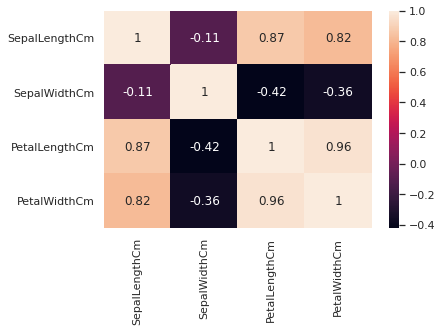

In [56]:
sns.heatmap(iris.corr(), annot= True)

In [57]:
iris = iris.drop(columns=['SepalWidthCm'])
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [58]:
X = iris.drop(columns=['Species'], axis=1)
y = iris['Species']
y.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2},inplace = True)

In [59]:
# Split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier using 3 neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the training data
knn.fit(X_train,y_train)
# Get predictions of KNN based on testing data
knn_predict = knn.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(confusion_matrix(y_test, knn_predict))
print(classification_report(y_test, knn_predict))

[[ 8  0  0]
 [ 0  9  2]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.82      0.86        11
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



By splitting up our Iris dataset into training and testing data and applying them to KNN, the accuracy score of this model is around 90%. However, this accuracy score may not be the best estimate to the accuracy of our KNN model. We can find a better estimate using cross validation to perform multiple KNN models by uniquely splitting the dataset (n-times) everytime we perform a KNN model. This will give us a better evaluation on how the KNN model will perform on this particular dataset.

In [62]:
from sklearn.model_selection import cross_val_score
# Create a new KNN model
knn_cval = KNeighborsClassifier(n_neighbors=3)
# Train model with cv of 10 
knn_cv_scores = cross_val_score(knn_cval, X, y, cv=10)
# Print each cv score (accuracy) and average them
print(knn_cv_scores)
print('cv_scores mean: {}'.format(np.mean(knn_cv_scores)))

[1.         0.93333333 1.         0.93333333 0.93333333 1.
 0.93333333 1.         1.         1.        ]
cv_scores mean: 0.9733333333333334


By splitting the dataset uniquely 10 times to perform 10 KNN model evaluations it has a mean accuracy score of 97.3%, much higher than our previous accuracy score of 90%. The KNN model appears to perform well with this Iris dataset.

Finally, lets look at a different supervised model known as Gaussian Naive Bayes (GNB) using the same Iris dataset.

In [63]:
from sklearn.naive_bayes import GaussianNB
# Create a new GNB model
gnb = GaussianNB()
# Fit the classifier to the training data
gnb.fit(X_train, y_train)
# Get predictions of GNB based on testing data
gnb_pred = gnb.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(confusion_matrix(y_test, gnb_pred))
print(classification_report(y_test, gnb_pred))

[[ 8  0  0]
 [ 0 10  1]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [65]:
from sklearn.model_selection import cross_val_score
# Create a new GNB model
gnb_cval = GaussianNB()
# Train model with cv of 10 
gnb_cv_scores = cross_val_score(gnb_cval, X, y, cv=10)
# Print each cv score (accuracy) and average them
print(gnb_cv_scores)
print('cv_scores mean: {}'.format(np.mean(gnb_cv_scores)))

[0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
cv_scores mean: 0.96


Similar to the KNN model, our single GNB model had a accuracy score of 93% and when applying the same cross validation as KNN, the GNB model had a mean accuracy score of 96%. 

Looking at how the two supervised models performed, both can be evaluated as performing well and consistenly with this dataset in classifying the known labels.

>**2. How would you explain linear regression to a business executive?  What are some alternative models to a linear regression?  Describe a scenario based on a real or fictitious company.  At least 5-6 sentences.  No code required.**


A simple linear regression attempts to model the linear relationship between two variables: explanatory and dependent. For example, an explanatory variable could be someones height and the dependent variable is their weight. Using simple linear regression, we can model and show that a persons weight is generally dependent on their height. Using this linear line or function, we can generalize a person's weight based on knowing their height like the image show below.

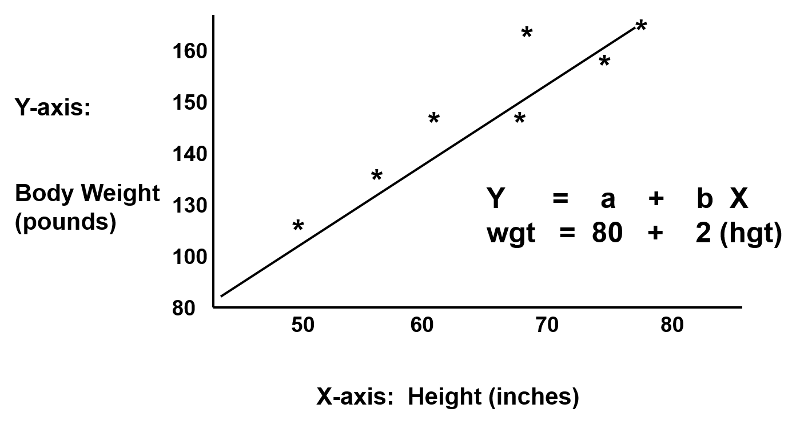

There are times where a simple linear regression is not possible or desirable, such as if there are more than one explanatory variable or if the relationship between variables is not linear. Linear regressions are also highly influenced by outlier cases. As a result, there are other regression models to account for these situations such as multiple linear regression, polynomial regression, and logistic regression.

Regression models can be used to draw insights regarding business decisions for a company. Let's look at a dataset regarding whether or not a consumer had clicked on an advertisment. We can use logistic regression to predict whether a consumer has clicked on an advertisment based on the available data.

In [72]:
ads_df = pd.read_csv("/content/drive/My Drive/Sac State/CSC177/data/advertising_clicks.csv")
ad_click = ads_df
ad_click

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [73]:
ad_click = ad_click.drop(['Ad Topic Line','City','Country','Timestamp','Timestamp'],axis=1)

In [74]:
X= ad_click.drop('Clicked on Ad',axis=1)
y= ad_click['Clicked on Ad']

In [75]:
# Split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [76]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model 
log_model = LogisticRegression()
# Fit the classification model to training data
log_model.fit(X_train,y_train)
# Get the models predictions based on test data
predict = log_model.predict(X_test)

In [77]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[94  5]
 [12 89]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        99
           1       0.95      0.88      0.91       101

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200



In [78]:
from sklearn.model_selection import cross_val_score
# Create a new Logistic Regression model 
log_cv = LogisticRegression()
# Train model with cv of 10 
log_cv_scores = cross_val_score(log_cv, X, y, cv=10)
# Print each cv score (accuracy) and average them
print(log_cv_scores)
print('cv_scores mean: {}'.format(np.mean(log_cv_scores)))

[0.94 0.91 0.88 0.85 0.9  0.89 0.95 0.87 0.93 0.95]
cv_scores mean: 0.9069999999999998


Based on the avaiable data, the logistic regression model was able to predict whether a consumer had clicked on an advertisment within an accuracy of 92% but using cross validation, thre more reliable accuracy estimate is 90.7%. By learning which type of consumer is more likely to click an advertisment, a company may improve their sales by launching more targeted advertisments to that consumer demographic.

> **3. Select a data science competition to do some preliminary research and provide advice on how you would approach this problem.  No code required**





> **a. Find an active data science competition and give a brief summary of the challenge.  It must be in the domain or related to data analytic topics (discussed in class or even more advanced ones are ok): https://www.kaggle.com/competitions**

https://www.kaggle.com/c/nlp-getting-started/overview

This is one of the "Getting Started" Kaggle competitions for data scientists who want to gain experience with Natural Language Processing (NLP). The dataset includes a collection of Twitter tweets containing both announcements regarding disasters that have occured or regular tweets. However, these regular tweets may be using the same words or wording as the disaster tweets. This challenge requires the contestant to build a machine learning model that identifies which tweets are about real disasters and which are not.






> **b. Research some techniques to solve it.  Provide three links/citations to sources which have some relevant background topics that would be useful in solving this challenge.  Use Google Scholar to find sources from reputable computer science conferences and journals like IEEE, ACM, etc.  You will be graded on the quality of your sources and how relevant they are to your challenge.**


1. [N-Gram-Based Text Categorization](https://drive.google.com/file/d/1Tj2CfueGUqnxabP-KhxTx6l9PqHrmKsf/view?usp=sharing)


2. [Data Cleaning: Problems and Current Approaches](https://drive.google.com/file/d/1Xn7y7pL52iwyzrufxsMc8mphDzeBH12Y/view?usp=sharing)

3. [GloVe: Global Vectors for Word Representation](https://drive.google.com/file/d/1hhWiyPZ1BIRvo5y4Xe1Y1ityYjqgTIXg/view?usp=sharing)





> **c. Provide at least 2 paragraphs explanation on how you would solve this challenge.  What steps would you take? What machine learning models would you apply?  What tools from the different libraries we used this semester would you apply?**

First, I would explore the dataset and identify any key elements that would improve or hinder the NLP model. I would check if there were any missing values and where they may occur, if necessary decide whether or not to remove them all together. Decide which columns in the raw dataset are necessary and determine if any need to be dropped. Begin explanatory data analysis by trying to observe any differences or patterns between tweets that are real and those which are not. As well as, cleaning the text data such as spelling errors, identifying and removing stop words, remove website links, remove punctuation(@, #, etc.), remove emojis, etc.


Once the dataset is ready to be used, we can use one of many text classification models. We explored Naive Bayes text classification in this class but there are other text classifications that may perform better such as BERT or GloVe. Utilizing these models will be key to identifying which tweets are real disasters and which are not. These classification models have their own libraries to be utilized while using sklearn's train_test_split library to traing and test the dataset using our desired NLP model. We will also continue using libraries such as pandas, numpy, pyplot, seaborn, etc. for accessing the data and helping develop our explanatory data analysis.



